In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
print("Uyarılar kapatıldı")

Uyarılar kapatıldı


In [2]:
pip install dateparser

Note: you may need to restart the kernel to use updated packages.


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df=pd.read_csv('veri_seti.csv',sep=',', index_col='Tarih', parse_dates=['Tarih'], date_parser=dateparse).fillna(0)

In [4]:
df.head()

,acilis,enyuksek,endusuk,kapanis,duzeltilmiskapanis,hacim
Tarih,,,,,,
2017-06-28,99439.101563,100617.703125,99418.601563,100617.703125,100617.703125,803262400
2017-06-29,100916.796875,100990.500000,100009.203125,100190.296875,100190.296875,815416000
2017-06-30,100032.500000,100778.101563,99825.601563,100440.398438,100440.398438,769506300
2017-07-03,100639.296875,100957.796875,100438.500000,100522.296875,100522.296875,671102000
2017-07-04,100539.101563,101245.796875,100449.203125,101207.796875,101207.796875,847241900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1246 entries, 2017-06-28 to 2022-06-23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acilis              1246 non-null   float64
 1   enyuksek            1246 non-null   float64
 2   endusuk             1246 non-null   float64
 3   kapanis             1246 non-null   float64
 4   duzeltilmiskapanis  1246 non-null   float64
 5   hacim               1246 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.1 KB


In [6]:
df.isna().sum()

acilis                0
enyuksek              0
endusuk               0
kapanis               0
duzeltilmiskapanis    0
hacim                 0
dtype: int64

In [7]:
df.head()

,acilis,enyuksek,endusuk,kapanis,duzeltilmiskapanis,hacim
Tarih,,,,,,
2017-06-28,99439.101563,100617.703125,99418.601563,100617.703125,100617.703125,803262400
2017-06-29,100916.796875,100990.500000,100009.203125,100190.296875,100190.296875,815416000
2017-06-30,100032.500000,100778.101563,99825.601563,100440.398438,100440.398438,769506300
2017-07-03,100639.296875,100957.796875,100438.500000,100522.296875,100522.296875,671102000
2017-07-04,100539.101563,101245.796875,100449.203125,101207.796875,101207.796875,847241900


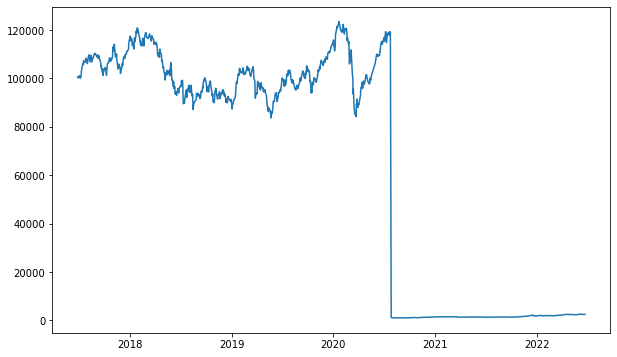

In [8]:
plt.figure(figsize=(10,6)) 
plt.plot(df.kapanis)  
plt.show()

In [9]:
df.drop('duzeltilmiskapanis',axis=1, inplace=True)

In [10]:
df.head()

,acilis,enyuksek,endusuk,kapanis,hacim
Tarih,,,,,
2017-06-28,99439.101563,100617.703125,99418.601563,100617.703125,803262400
2017-06-29,100916.796875,100990.500000,100009.203125,100190.296875,815416000
2017-06-30,100032.500000,100778.101563,99825.601563,100440.398438,769506300
2017-07-03,100639.296875,100957.796875,100438.500000,100522.296875,671102000
2017-07-04,100539.101563,101245.796875,100449.203125,101207.796875,847241900


In [11]:
df['avaraj'] = (df['acilis'] + df['enyuksek'] + df['endusuk'] + df['kapanis']+ df['hacim']) / 5

In [12]:
df.head()

,acilis,enyuksek,endusuk,kapanis,hacim,avaraj
Tarih,,,,,,
2017-06-28,99439.101563,100617.703125,99418.601563,100617.703125,803262400,1.607325e+08
2017-06-29,100916.796875,100990.500000,100009.203125,100190.296875,815416000,1.631636e+08
2017-06-30,100032.500000,100778.101563,99825.601563,100440.398438,769506300,1.539815e+08
2017-07-03,100639.296875,100957.796875,100438.500000,100522.296875,671102000,1.343009e+08
2017-07-04,100539.101563,101245.796875,100449.203125,101207.796875,847241900,1.695291e+08


In [13]:
df['sonraki_ay']=df['kapanis'].shift(-30) 

In [14]:
df.tail()

,acilis,enyuksek,endusuk,kapanis,hacim,avaraj,sonraki_ay
Tarih,,,,,,,
2022-06-17,2491.500000,2533.300049,2485.800049,2533.300049,2651804000,5.303628e+08,NaN
2022-06-20,2549.000000,2555.100098,2511.300049,2539.199951,2620212300,5.240445e+08,NaN
2022-06-21,2557.100098,2582.199951,2550.800049,2575.899902,2721684000,5.443389e+08,NaN
2022-06-22,2572.199951,2586.899902,2552.100098,2574.300049,2424694900,4.849410e+08,NaN
2022-06-23,2576.100098,2588.699951,2533.899902,2543.199951,2624314200,5.248649e+08,NaN


In [24]:
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop('sonraki_ay',axis=1)
X=preprocessing.scale(X)
y=df['sonraki_ay']

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [30]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(random_state=1)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 96.3539 %


In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
accuracy=lr.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 90.44 %


In [32]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
accuracy=lgbm.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 96.989 %


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
accuracy=gb.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 96.8935 %
